In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

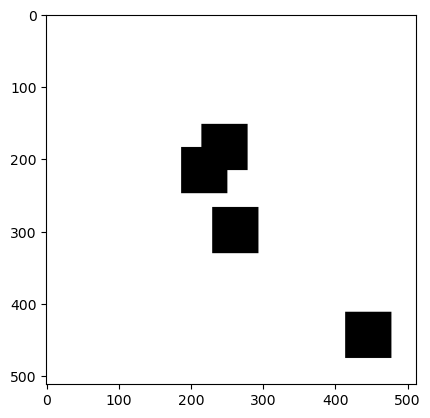

In [53]:
def create_array_with_zeros(n, hole_ratio, number_of_holes=1):
   # Create an array of ones
   arr = np.ones((n, n))
   
   # Calculate the size of the square containing zeros
   zero_size = n // hole_ratio
   
   for _ in range(number_of_holes):
      # Generate random coordinates for the top-left corner of the zero square
      start_row = np.random.randint(0, n - zero_size + 1)
      start_col = np.random.randint(0, n - zero_size + 1)
   
      # Set the values in the zero square region to zeros
      arr[start_row:start_row + zero_size, start_col:start_col + zero_size] = 0

   return arr

plt.imshow(create_array_with_zeros(512, 8, 4), cmap='gray')

In [54]:
images = glob('data/covid-chestxray-dataset/resized/*')
size = 512
hole_ratio = 16
number_of_holes = 8
num_masks = len(images)
for image in images:
   name, ext = os.path.splitext(os.path.basename(image))
   my_mask = create_array_with_zeros(size, hole_ratio, number_of_holes)
   if number_of_holes == 1:
      os.makedirs(f'{os.path.dirname(image)}/masks/{number_of_holes}_hole/', exist_ok=True)
      np.save(f'{os.path.dirname(image)}/masks/{number_of_holes}_hole/{name}_mask', my_mask)
   else:
      os.makedirs(f'{os.path.dirname(image)}/masks/{number_of_holes}_holes/', exist_ok=True)
      np.save(f'{os.path.dirname(image)}/masks/{number_of_holes}_holes/{name}_mask', my_mask)
   # if image not in resized:
   #    os.remove(image)
   # im = Image.open(image)
   # im = im.resize((512, 512))
   # im = im.convert('L')
   # im.save(os.path.dirname(image)+'/resized/'+os.path.basename(image))
